In [21]:
import numpy as np

from covidboosters import IndividualSusceptibilityModel, OutbreakRiskModel
from scripts.default_parameters import DEFAULT_PARAMETERS

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.ioff()
rc_params = {
    "axes.spines.top": False,
    "axes.spines.right": False,
    "figure.autolayout": True,
    "axes.autolimit_mode": "round_numbers",
    "savefig.transparent": True,
    "savefig.format": "pdf",
    "svg.fonttype": "none",
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 14,
}
sns.set_theme(style="ticks", rc=rc_params)

In [23]:
rng = np.random.default_rng(0)

In [24]:
period = DEFAULT_PARAMETERS["period"]
unvaccinated_reproduction_no_mean = DEFAULT_PARAMETERS[
    "unvaccinated_reproduction_no_mean"
]
unvaccinated_reproduction_no_prop_variation = DEFAULT_PARAMETERS[
    "unvaccinated_reproduction_no_prop_variation"
]
peak_transmission_time = DEFAULT_PARAMETERS["peak_transmission_time"]
dispersion_param = DEFAULT_PARAMETERS["dispersion_param"]
generation_time_dist = DEFAULT_PARAMETERS["generation_time_dist"]

In [25]:
vaccination_time_range = DEFAULT_PARAMETERS["vaccination_time_range"]
proportion_vaccinated = DEFAULT_PARAMETERS["proportion_vaccinated"]
population_size = DEFAULT_PARAMETERS["population_size"]
antibody_model_params_pop = DEFAULT_PARAMETERS["antibody_model_params_pop"]
antibody_model_params_random_effects = DEFAULT_PARAMETERS[
    "antibody_model_params_random_effects"
]
susceptibility_func_params = DEFAULT_PARAMETERS["susceptibility_func_params"]

In [26]:
month_starts = np.arange(0, period + 1, period / 12)
month_list = ["Jan", "", "", "Apr", "", "", "Jul", "", "", "Oct", "", "", "Jan"]

In [27]:
individual_susceptibility_model_ex = IndividualSusceptibilityModel(
    antibody_model_params=antibody_model_params_pop,
    susceptibility_func_params=susceptibility_func_params,
    vaccination_times=0,
)

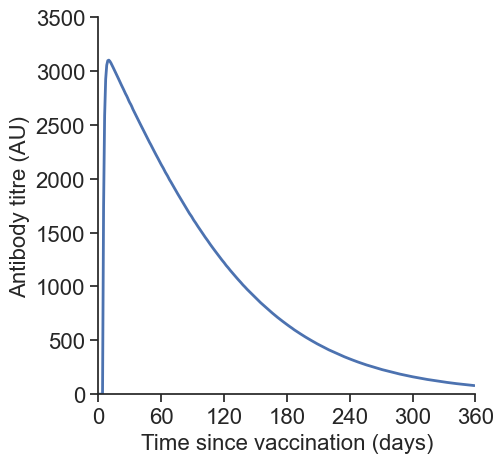

In [28]:
time_vec_ex = np.arange(period)
antibody_vec_ex = individual_susceptibility_model_ex.antibodies(time_vec_ex)
fig = plt.figure()
ax = fig.add_subplot(box_aspect=1)
ax.plot(time_vec_ex, antibody_vec_ex)
ax.set_xlim(0, period)
ax.set_xticks(np.arange(0, period + 1, period / 6))
ax.set_ylim(0, 3500)
ax.set_xlabel("Time since vaccination (days)")
ax.set_ylabel("Antibody titre (AU)")
plt.savefig("figures_initial/vaccination_ex/indiv_antibodies.pdf")
plt.show()

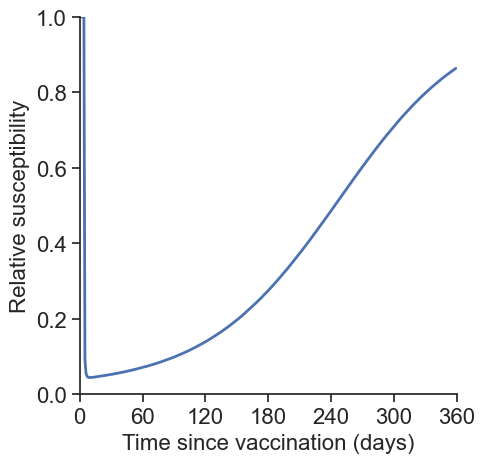

In [29]:
susceptibility_vec_ex = individual_susceptibility_model_ex.susceptibility(time_vec_ex)
fig = plt.figure()
ax = fig.add_subplot(box_aspect=1)
ax.plot(time_vec_ex, susceptibility_vec_ex)
ax.set_xlim(0, period)
ax.set_xticks(np.arange(0, period + 1, period / 6))
ax.set_ylim(0, 1)
ax.set_xlabel("Time since vaccination (days)")
ax.set_ylabel("Relative susceptibility")
plt.savefig("figures_initial/vaccination_ex/indiv_susceptibility.pdf")
plt.show()

In [30]:
model_kwargs = {
    "period": period,
    "unvaccinated_reproduction_no_mean": unvaccinated_reproduction_no_mean,
    "unvaccinated_reproduction_no_prop_variation": unvaccinated_reproduction_no_prop_variation,
    "peak_transmission_time": peak_transmission_time,
    "generation_time_dist": generation_time_dist,
    "dispersion_param": dispersion_param,
    "vaccination_time_range": vaccination_time_range,
    "proportion_vaccinated": proportion_vaccinated,
    "antibody_model_params_pop": antibody_model_params_pop,
    "antibody_model_params_random_effects": antibody_model_params_random_effects,
    "susceptibility_func_params": susceptibility_func_params,
    "population_size": population_size,
    "rng": rng,
}
model = OutbreakRiskModel(**model_kwargs)
model_unvacc = OutbreakRiskModel(**{**model_kwargs, "proportion_vaccinated": 0})

In [31]:
time_vec = np.arange(2 * period)
unvaccinated_reproduction_no_vec = model.unvaccinated_reproduction_no(time_vec)
reproduction_no_vec = model.reproduction_no(time_vec)
susceptibility_vec = model.susceptibility(time_vec)

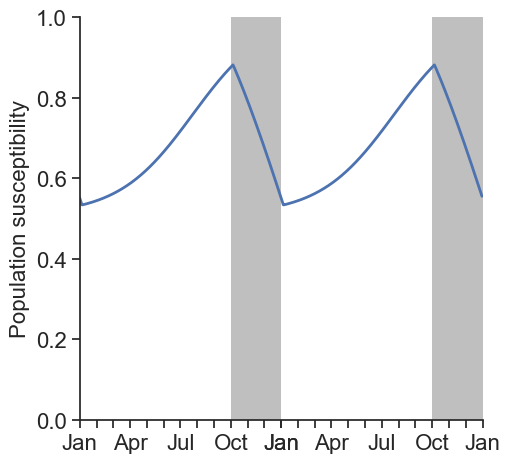

In [32]:
fig = plt.figure()
ax = fig.add_subplot(box_aspect=1)
ax.plot(time_vec, susceptibility_vec)
ax.set_xlim(0, 2 * period)
ax.set_xticks(
    np.append(month_starts, month_starts + period),
    labels=month_list + month_list,
)
ax.set_ylim(0, 1)
ax.fill_betweenx(
    y=[0, 1],
    x1=vaccination_time_range[0],
    x2=vaccination_time_range[1],
    color="gray",
    alpha=0.5,
    linewidth=0,
)
ax.fill_betweenx(
    y=[0, 1],
    x1=period + vaccination_time_range[0],
    x2=period + vaccination_time_range[1],
    color="gray",
    alpha=0.5,
    linewidth=0,
)
ax.set_ylabel("Population susceptibility")
plt.savefig("figures_initial/vaccination_ex/pop_susceptibility.pdf")
plt.show()

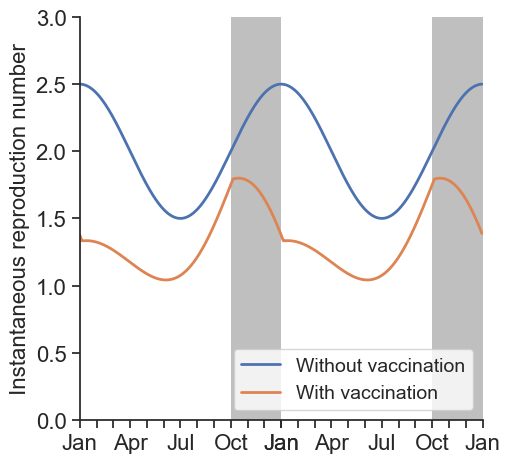

In [33]:
fig = plt.figure()
ax = fig.add_subplot(box_aspect=1)
ax.plot(time_vec, unvaccinated_reproduction_no_vec, label="Without vaccination")
ax.plot(time_vec, reproduction_no_vec, label="With vaccination")
ax.set_xlim(0, 2 * period)
ax.set_xticks(
    np.append(month_starts, month_starts + period),
    labels=month_list + month_list,
)
ax.set_ylim(0, 3)
ylim = ax.get_ylim()
ax.fill_betweenx(
    y=ylim,
    x1=vaccination_time_range[0],
    x2=vaccination_time_range[1],
    color="gray",
    alpha=0.5,
    linewidth=0,
)
ax.fill_betweenx(
    y=ylim,
    x1=period + vaccination_time_range[0],
    x2=period + vaccination_time_range[1],
    color="gray",
    alpha=0.5,
    linewidth=0,
)
ax.set_ylim(ylim)
ax.set_ylabel("Instantaneous reproduction number")
ax.legend(loc="lower right")
plt.savefig("figures_initial/vaccination_ex/reproduction_number.pdf")
plt.show()

In [34]:
cor_vec = model.case_outbreak_risk(time_vec)
cor_vec_unvacc = model_unvacc.case_outbreak_risk(time_vec)

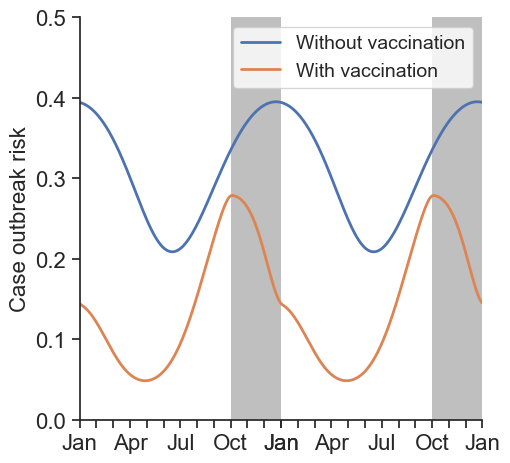

In [35]:
fig = plt.figure()
ax = fig.add_subplot(box_aspect=1)
ax.plot(time_vec, cor_vec_unvacc, label="Without vaccination")
ax.plot(time_vec, cor_vec, label="With vaccination")
ax.set_xlim(0, 2 * period)
ax.set_xticks(
    np.append(month_starts, month_starts + period),
    labels=month_list + month_list,
)
ax.set_ylim(0, 0.5)
ax.fill_betweenx(
    y=[0, 1],
    x1=vaccination_time_range[0],
    x2=vaccination_time_range[1],
    color="gray",
    alpha=0.5,
    linewidth=0,
)
ax.fill_betweenx(
    y=[0, 1],
    x1=period + vaccination_time_range[0],
    x2=period + vaccination_time_range[1],
    color="gray",
    alpha=0.5,
    linewidth=0,
)
ax.set_ylabel("Case outbreak risk")
ax.legend()
plt.savefig("figures_initial/vaccination_ex/outbreak_risk.pdf")
plt.show()